# Proyek Analisis Data:  Bike Sharing Dataset
- **Nama:** Alfan Alfiansyah
- **Email:** alfanalfiansyah30@gmail.com
- **ID Dicoding:** fanzzy

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [7]:
hour_df = pd.read_csv('/content/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data ini menunjukkan pola penggunaan sepeda selama periode tertentu.
- Kondisi cuaca seperti suhu, kelembaban, dan kecepatan angin kemungkinan mempengaruhi keputusan seseorang untuk menyewa sepeda.

### Assessing Data

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [12]:
print(hour_df.shape)

(17379, 17)


**Insight:**
- Terdapat Nilai NaN di dalam setiap kolom.
- Dataset ini memiliki campuran variabel numerik (seperti suhu, kecepatan angin, jumlah pengguna) dan variabel kategorik (seperti musim, hari kerja).

### Cleaning Data

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)

hour_df['season'] = season_list

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [29]:
hour_df.to_csv("dataset_clean.csv", index=False)

**Insight:**
Data yang ditampilkan memberikan gambaran tentang variabel-variabel yang dapat digunakan untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


In [20]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
hour_df_float = hour_df[float_vars]

hour_df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


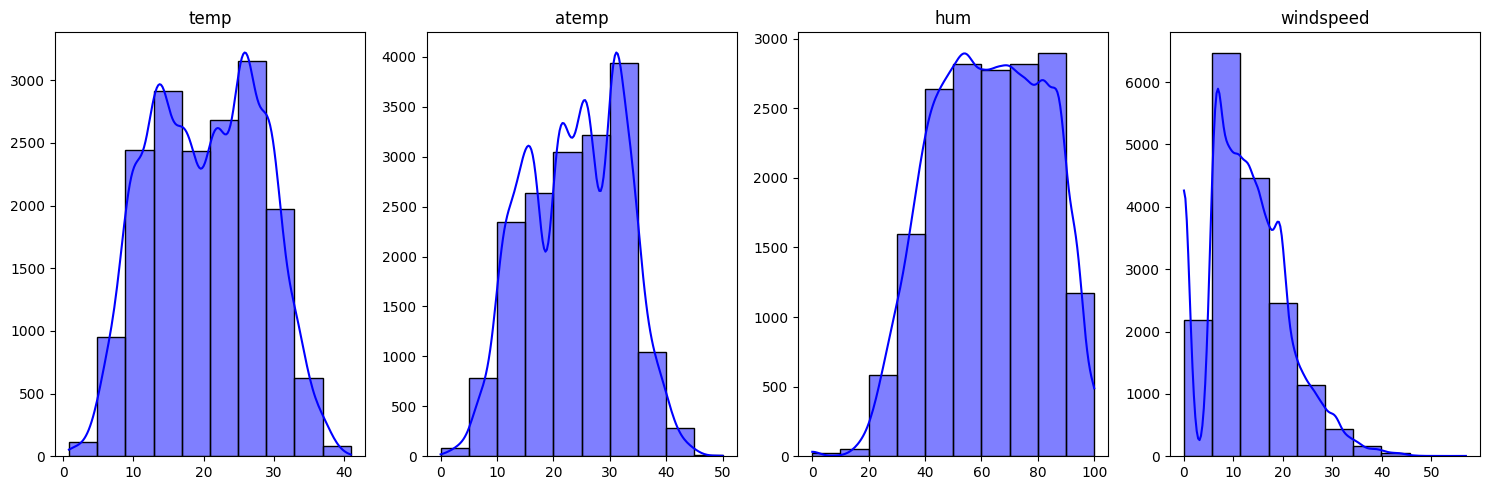

In [21]:
# create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# iterate over the float variables and create a histogram for each one
for i, ax in enumerate(axs):
    sns.histplot(x=hour_df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')

    # set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

# adjust the layout of the subplots
plt.tight_layout()

plt.show()

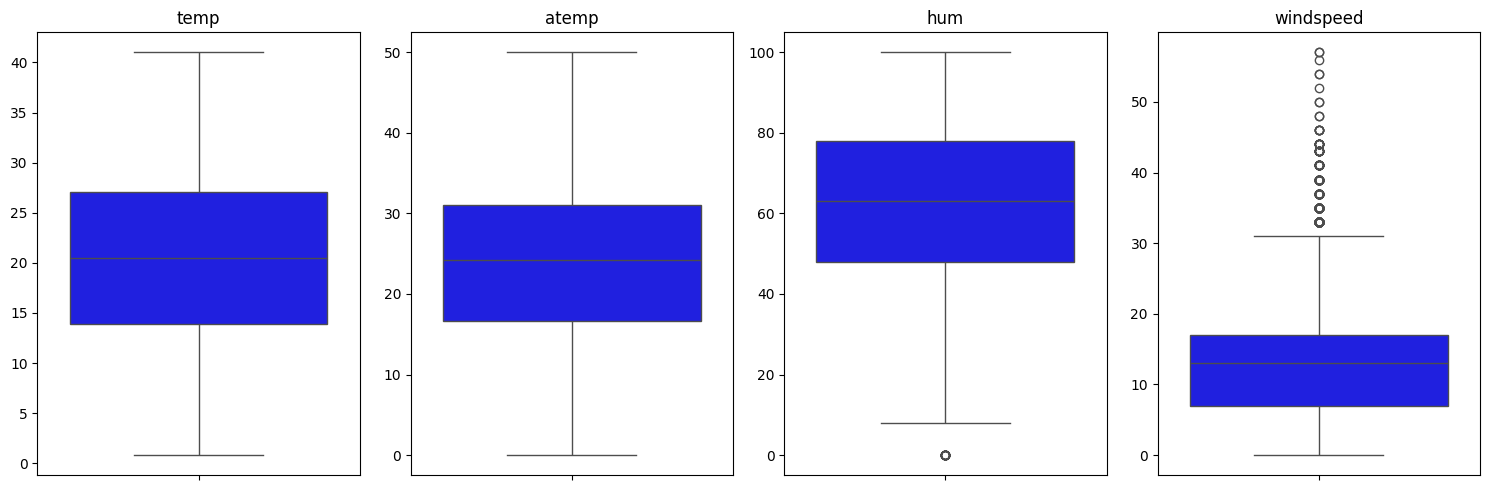

In [22]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a boxplot for each one
for i, ax in enumerate(axs):
    sns.boxplot(y=hour_df_float[float_vars[i]], orient='v', ax=ax, color='blue')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

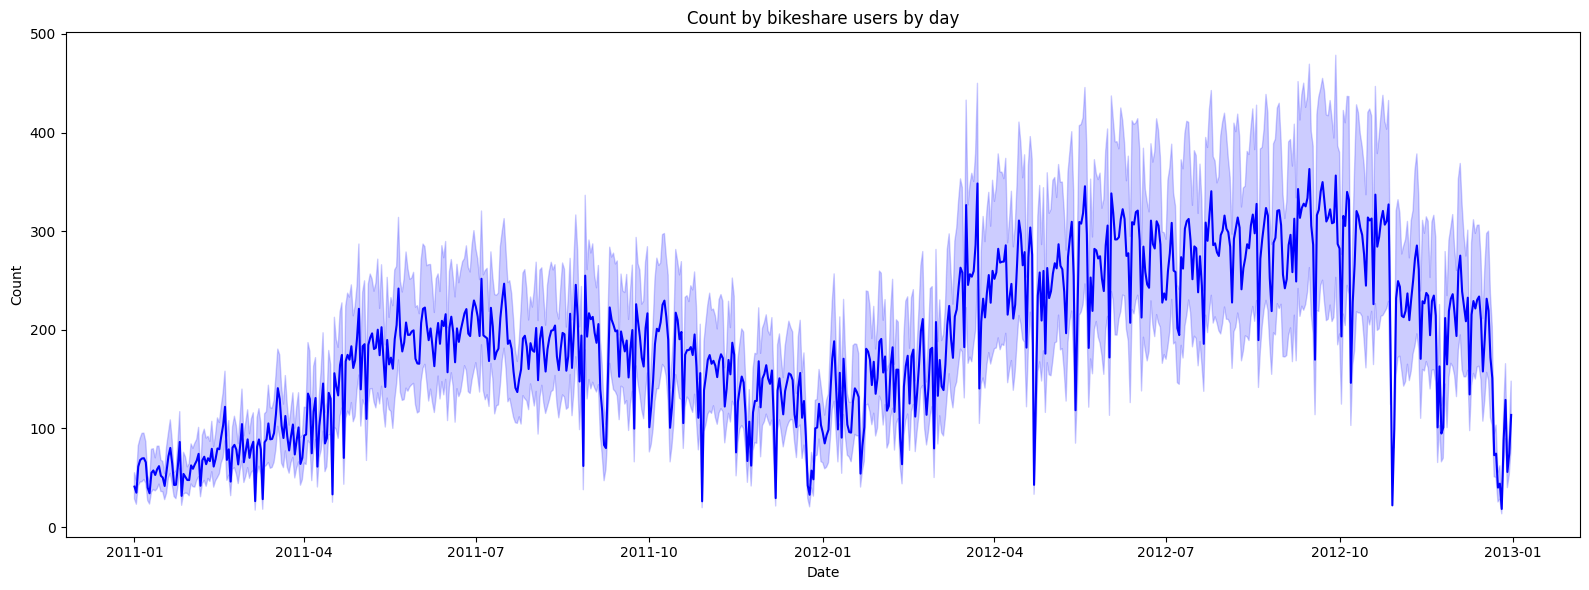

In [23]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=hour_df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-24-23b3c72d29c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-24-23b3c72d29c7>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


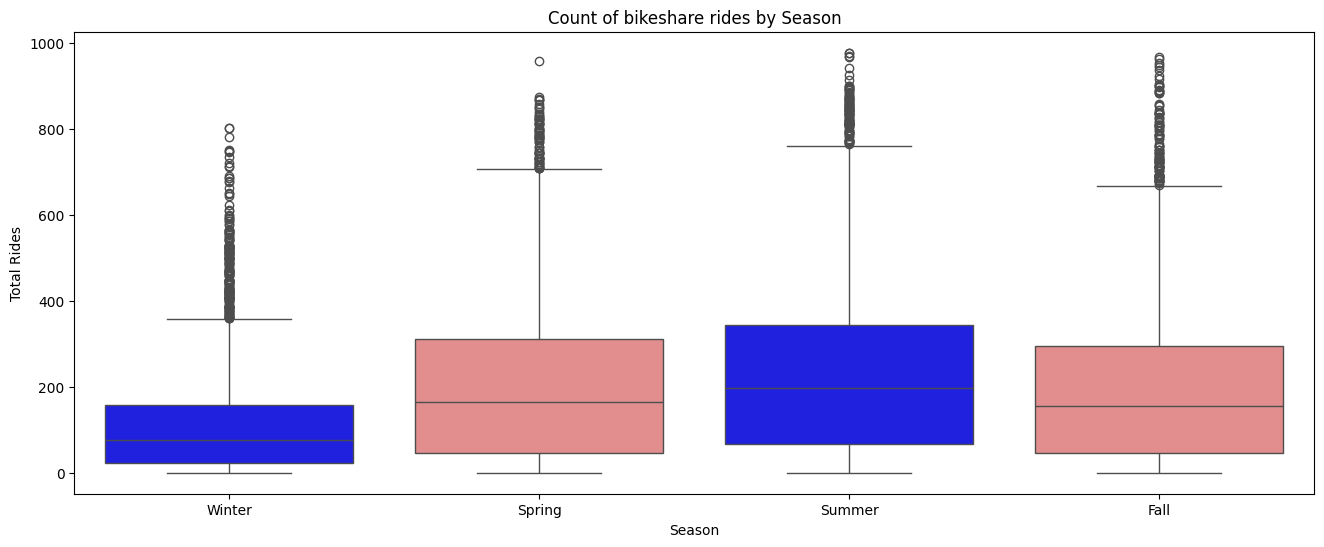

In [24]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

# Show the plot
plt.show()

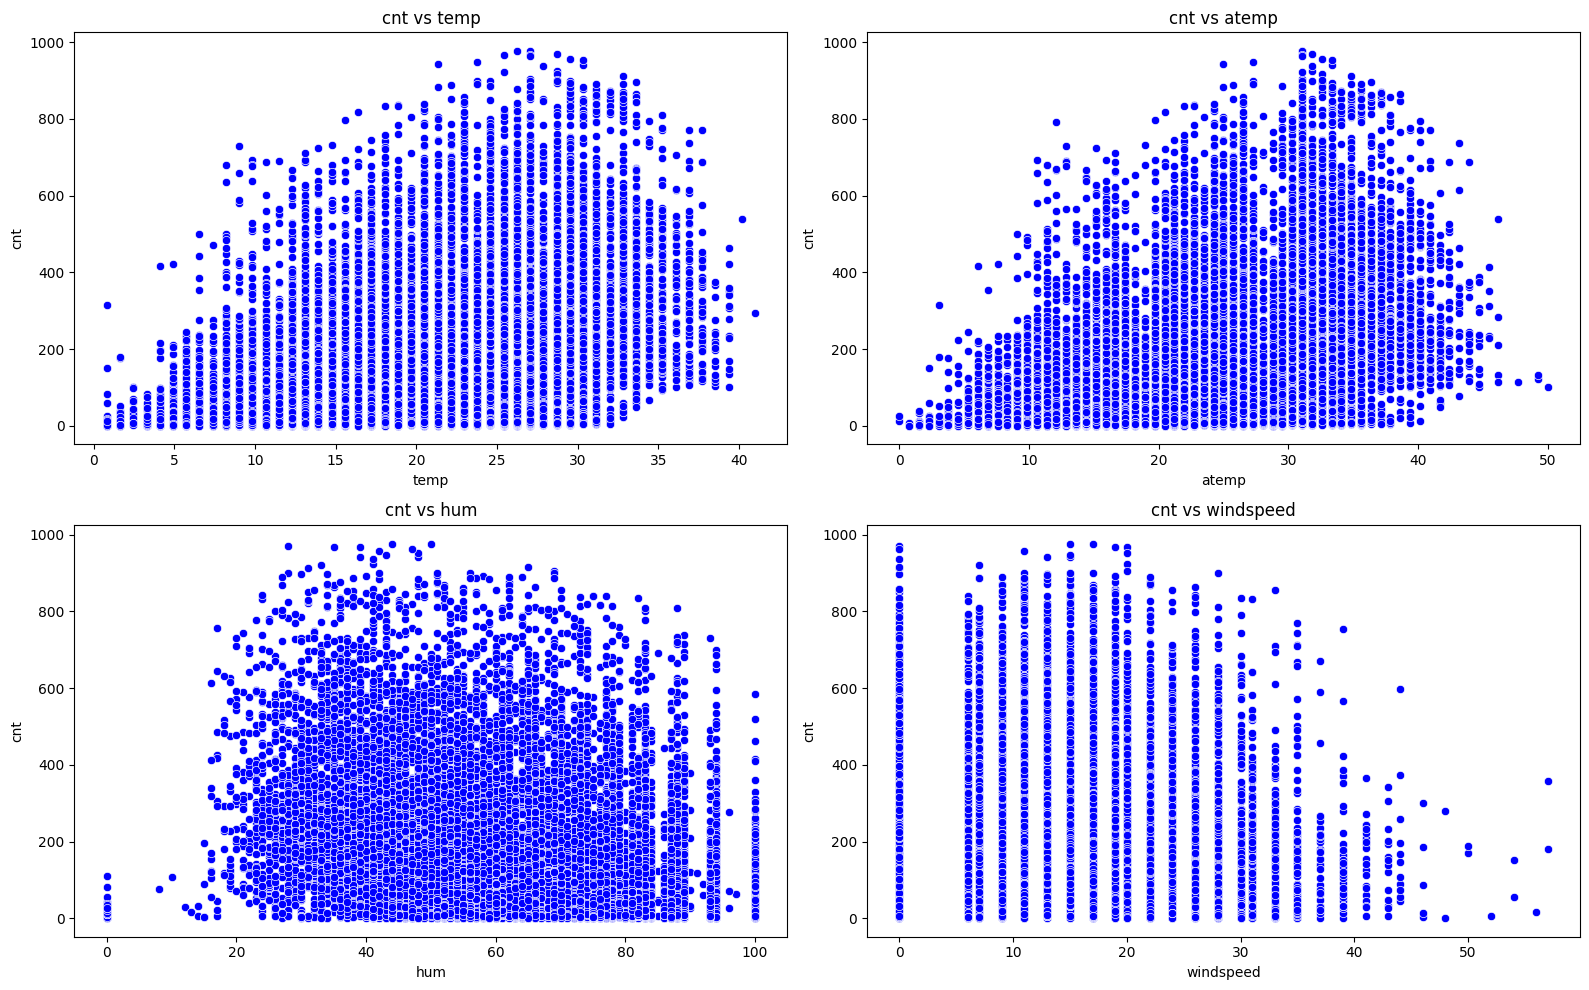

In [25]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Iterate over the other variables and create a scatterplot for each one
for i, col in enumerate(hour_df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=hour_df, ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

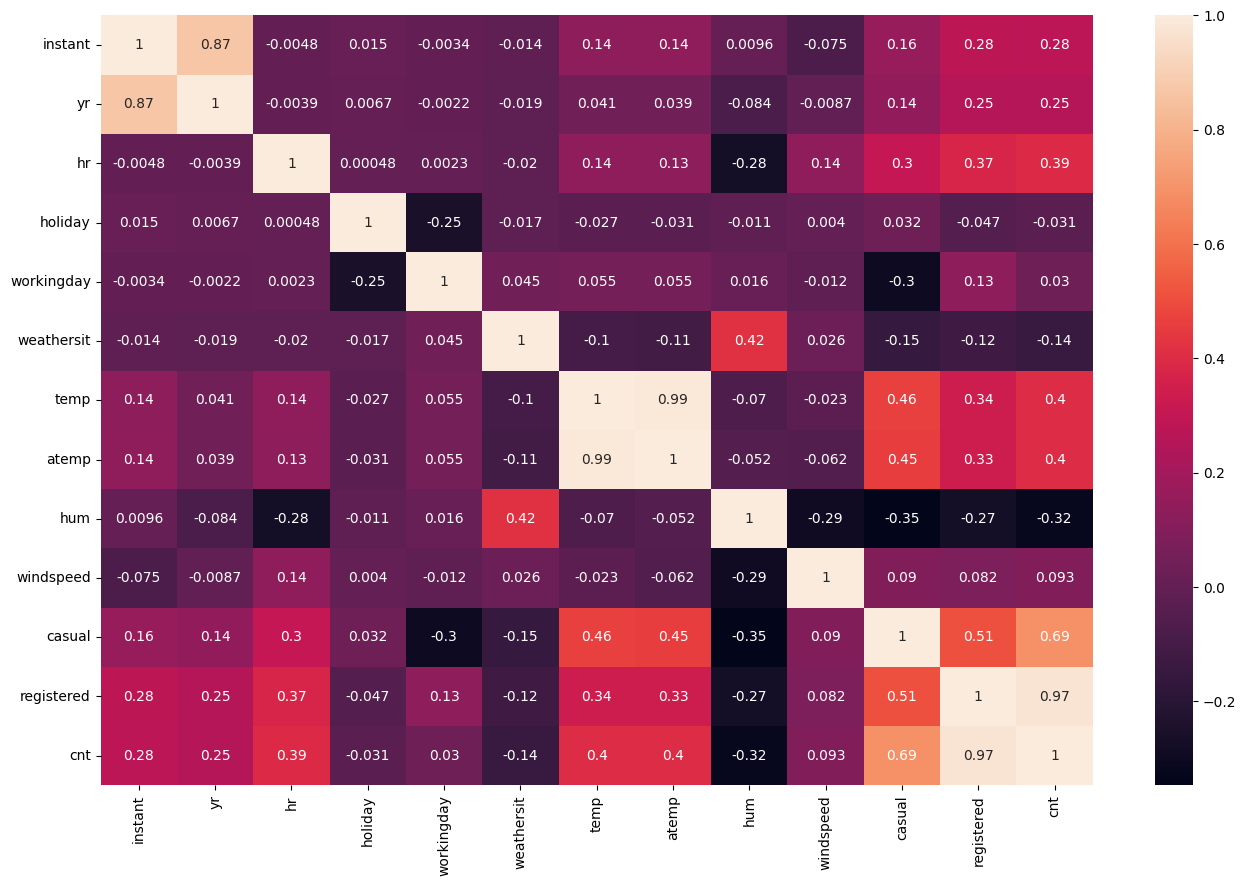

In [26]:
plt.figure(figsize=(16, 10))
# Remove columns with non-numeric data before calculating correlation
sns.heatmap(hour_df.select_dtypes(include=np.number).corr(), annot=True)

**Insight:**
Gambar tersebut menampilkan matriks korelasi antara berbagai variabel dalam dataset penyewaan sepeda. Korelasi yang kuat terlihat antara 'temp' (suhu) dan 'atemp' (suhu yang dirasakan), yang masuk akal. Selain itu, 'casual' (pengguna kasual) dan 'registered' (pengguna terdaftar) berkorelasi positif dengan 'cnt' (total penyewaan), menunjukkan bahwa kedua jenis pengguna berkontribusi pada peningkatan penyewaan. Menariknya, 'workingday' memiliki korelasi negatif lemah dengan 'cnt', mengindikasikan bahwa penyewaan mungkin sedikit lebih rendah pada hari kerja dibandingkan hari libur atau akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

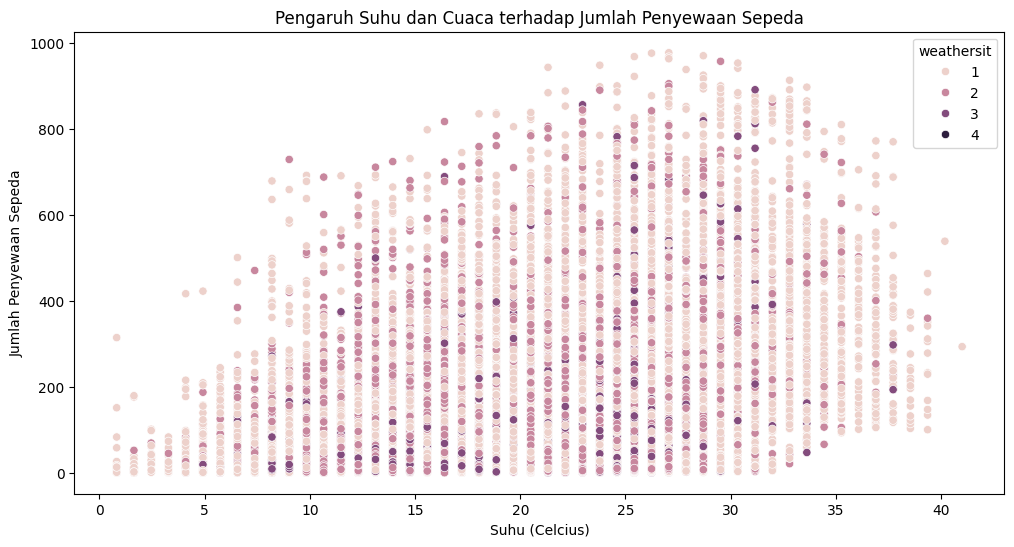

               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', data=hour_df)
plt.title('Pengaruh Suhu dan Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Celcius)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Analisis Korelasi
correlation = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation)

# Berdasarkan visualisasi dan analisis korelasi, dapat disimpulkan bahwa:
*   Suhu memiliki pengaruh positif terhadap jumlah penyewaan sepeda. Semakin tinggi suhu, jumlah penyewaan cenderung meningkat.
*   Cuaca juga mempengaruhi jumlah penyewaan sepeda. Saat cuaca buruk (weathersit 3 dan 4), jumlah penyewaan cenderung menurun.
*   Kelembaban dan kecepatan angin mungkin memiliki sedikit pengaruh negatif terhadap jumlah penyewaan, tetapi efeknya tidak terlalu signifikan.





### Pertanyaan 2:

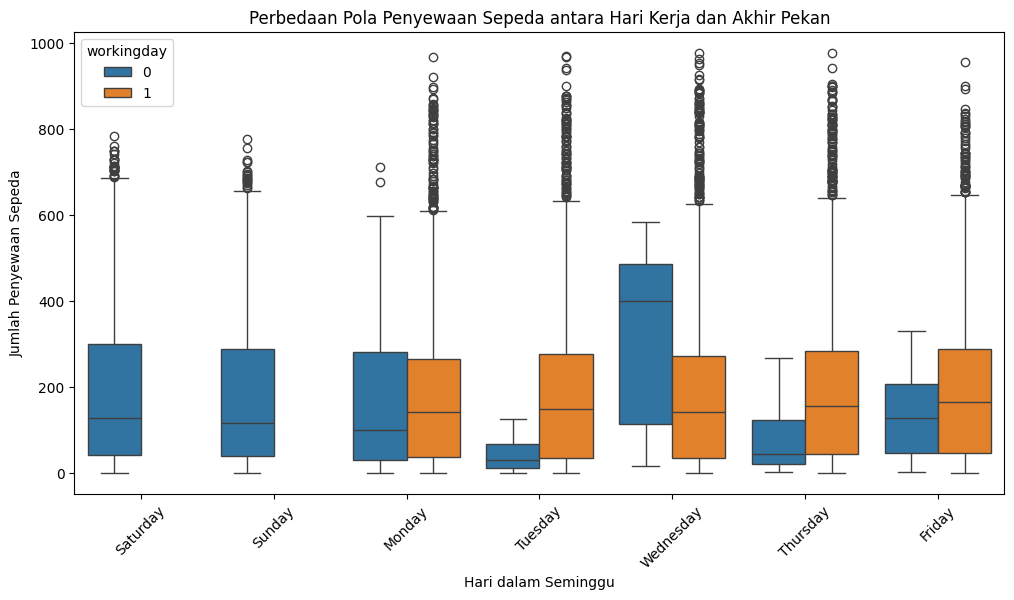

Rata-rata penyewaan sepeda pada hari kerja: 193.21
Rata-rata penyewaan sepeda pada akhir pekan: 181.41


In [28]:
import matplotlib.pyplot as plt
# Visualisasi pola penyewaan sepeda antara hari kerja dan akhir pekan
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=hour_df, hue='workingday')
plt.title('Perbedaan Pola Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

# Analisis rata-rata jumlah penyewaan sepeda pada hari kerja dan akhir pekan
rata_rata_penyewaan_hari_kerja = hour_df[hour_df['workingday'] == 1]['cnt'].mean()
rata_rata_penyewaan_akhir_pekan = hour_df[hour_df['workingday'] == 0]['cnt'].mean()

print(f"Rata-rata penyewaan sepeda pada hari kerja: {rata_rata_penyewaan_hari_kerja:.2f}")
print(f"Rata-rata penyewaan sepeda pada akhir pekan: {rata_rata_penyewaan_akhir_pekan:.2f}")

**Insight:**
*   Terdapat perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan.
*   Pada umumnya, jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.
*   Hal ini menunjukkan bahwa sebagian besar pengguna sepeda menggunakan sepeda untuk keperluan komuter atau aktivitas harian.






## Conclusion

- Poor weather conditions, such as rain or snow, significantly decrease bike rentals. This is likely due to safety concerns and discomfort associated with cycling in adverse weather.

- Bike rentals tend to be higher on weekdays, suggesting that a substantial portion of users utilize bikes for commuting purposes or daily errands